We will plot a invariant mass distribution from a LHE input file.

First, some basic imports.

In [1]:
import math

import hist

import pylhe

In [2]:
# Use an example LHE file from package scikit-hep-testdata
from skhep_testdata import data_path

lhe_file = data_path("pylhe-drell-yan-ll-lhe.gz")

Prepare a histogram to calculate the invariant mass of two particles.

In [3]:
mass_hist = hist.Hist.new.Reg(30, 50, 150).Int64()

Use the generator provided by pylhe to read the events.

In [4]:
events = pylhe.to_awkward(pylhe.read_lhe_with_attributes(lhe_file))
mass_hist.fill(
    (events.particles.vector[:, -1] + events.particles.vector[:, -2]).mass,
    weight=events.eventinfo.weight,
)

Hist(Regular(30, 50, 150, label='Axis 0'), storage=Int64()) # Sum: 13189080.0 (16780000.0 with flow)

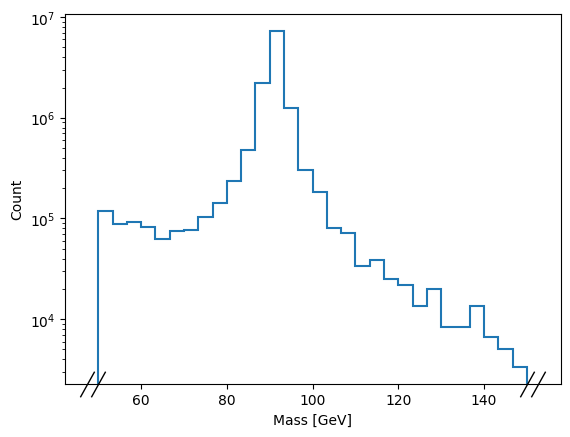

In [5]:
artists = mass_hist.plot1d()
ax = artists[0].stairs.axes
ax.set_yscale("log")
ax.set_xlabel("Mass [GeV]")
ax.set_ylabel("Count");

`pylhe` also has helpful graph representation of events so you can view what the LHE events you are studying look like.

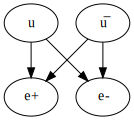

In [6]:
events = pylhe.read_lhe(lhe_file)
this_event = next(events)
this_event

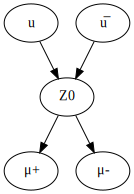

In [7]:
this_event = next(events)
this_event

You can also render these graphs into a PDF file.

In [8]:
this_event.graph.render(filename="z0-event", format="pdf", cleanup=True)

'z0-event.pdf'